### This Notebook allows us to observe how different Key factors like the Unemployment rate, Mortgage30 interest rate, and Median Sales Price affect on S&P Case-Shiller Home Price Index.

In [30]:
import pandas as pd
data = pd.read_csv('Data.csv')
data.head()

,Date,Population,Unirate,Mortgages,Index,Supply
0,2000-01-01,281083,4.0,8.2100,100.551,4.3
1,2000-02-01,281299,4.1,8.3250,101.339,4.3
2,2000-03-01,281531,4.0,8.2400,102.127,4.3
3,2000-04-01,281763,3.8,8.1525,102.922,4.4
4,2000-05-01,281996,4.0,8.5150,103.678,4.4


In [31]:
data.tail()

,Date,Population,Unirate,Mortgages,Index,Supply
279,2023-04-01,334880,3.4,6.3425,300.198,7.6
280,2023-05-01,335013,3.7,6.4250,302.620,7.2
281,2023-06-01,335163,3.6,6.7140,304.651,7.5
282,2023-07-01,335329,3.5,6.8400,306.634,7.0
283,2023-08-01,335501,3.8,7.0720,309.404,7.7


In [32]:
data.describe()

,Population,Unirate,Mortgages,Index,Supply
count,284.000000,284.000000,284.000000,284.000000,284.000000
mean,311630.510563,5.793310,5.053852,175.553331,5.926056
std,16511.079862,1.968764,1.366847,49.104021,1.942592
min,281083.000000,3.400000,2.684000,100.551000,3.300000
25%,297255.500000,4.400000,3.908750,142.468000,4.400000
50%,313160.000000,5.300000,4.861750,167.418000,5.400000
75%,327388.500000,6.700000,6.185000,194.020500,7.000000
max,335501.000000,14.700000,8.515000,309.404000,12.200000


In [33]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        284 non-null    object 
 1   Population  284 non-null    int64  
 2   Unirate     284 non-null    float64
 3   Mortgages   284 non-null    float64
 4   Index       284 non-null    float64
 5   Supply      284 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 13.4+ KB
None
(284, 6)


In [34]:
data.isnull().sum()

Date          0
Population    0
Unirate       0
Mortgages     0
Index         0
Supply        0
dtype: int64

In [35]:
data.corr()

/tmp/ipykernel_71829/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Population,Unirate,Mortgages,Index,Supply
Population,1.000000,-0.049621,-0.754180,0.780505,0.229857
Unirate,-0.049621,1.000000,-0.310812,-0.357248,0.092790
Mortgages,-0.754180,-0.310812,1.000000,-0.330562,0.090806
Index,0.780505,-0.357248,-0.330562,1.000000,0.309951
Supply,0.229857,0.092790,0.090806,0.309951,1.000000


/tmp/ipykernel_71829/1488358749.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)


<AxesSubplot: >

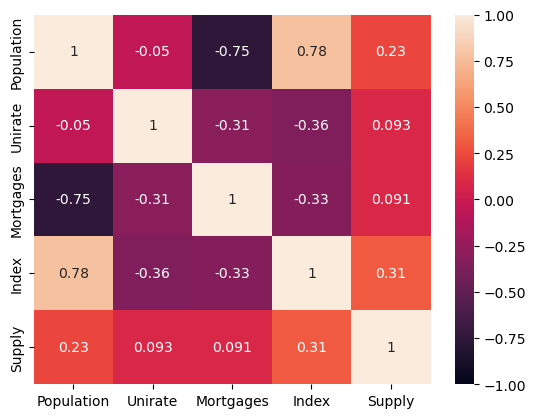

In [36]:


import seaborn as sns

sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True)

## Unemployment Rate vs Mortgage Rate(Negative Correlation)

<AxesSubplot: xlabel='Date'>

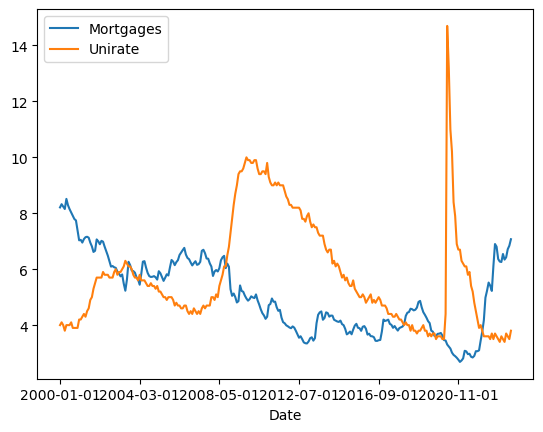

In [37]:
data.plot(x="Date", y=["Mortgages", "Unirate"], kind="line") 

data.plot(x="Date", y=["Mortgages", kind="line") 

## Supply vs Mortgage rate (positively corilated)

<AxesSubplot: xlabel='Date'>

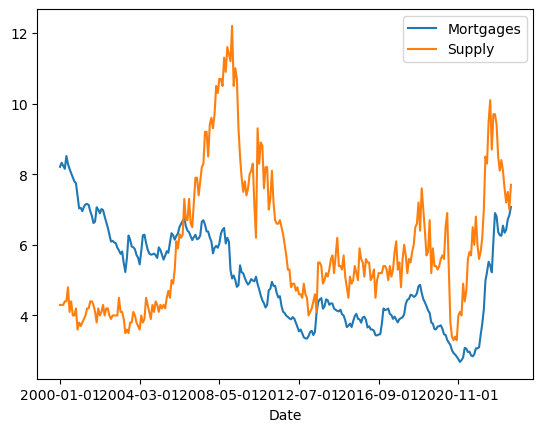

In [38]:
data.plot(x="Date", y=["Mortgages", "Supply"], kind="line") 

## Unemploymet Rate vs House Supply

<AxesSubplot: xlabel='Date'>

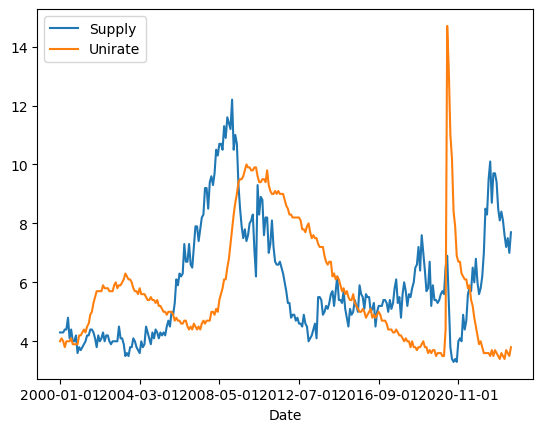

In [39]:
data.plot(x="Date", y=[ "Supply","Unirate"], kind="line") 

In [40]:
X = data[['Population', 'Unirate', 'Supply', 'Mortgages']]
y = data['Index']

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 23.3 (12.8%)
Model determination:  0.7751558048252596


In [42]:
new_data = pd.DataFrame({'Population': [281531], 'Unirate': [4.0], 'Supply': [4.3], 'Mortgages':[8.24]})
predictions = reg.predict(new_data)
predictions

array([133.51862798])

## RandomForest

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)


mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = rf.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 1.26 (0.699%)
Model determination:  0.9997434696724103


In [45]:
new_data = pd.DataFrame({'Population': [281531], 'Unirate': [4.0], 'Supply': [4.3], 'Mortgages':[8.24]})
predictions = rf.predict(new_data)
predictions

array([101.94859])

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)


mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = dt.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 4.43 (2.44%)
Model determination:  0.9961053987304593


In [47]:
new_data = pd.DataFrame({'Population': [281531], 'Unirate': [4.0], 'Supply': [4.3], 'Mortgages':[8.24]})
predictions = dt.predict(new_data)
predictions

array([102.61183333])

## Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=3)
gbr.fit(X_train,y_train)
pred = gbr.predict(X_test)


mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = gbr.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 1.77 (0.984%)
Model determination:  0.9999926235711466


In [53]:
new_data = pd.DataFrame({'Population': [281531], 'Unirate': [4.0], 'Supply': [3.3], 'Mortgages':[8.24]})
predictions = gbr.predict(new_data)
predictions

array([102.23004202])

## support vector machine regression

In [51]:
from sklearn.svm import SVR


svr = SVR(kernel="poly")
svr.fit(X_train,y_train)
pred = svr.predict(X_test)


mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = svr.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 48.5 (29.3%)
Model determination:  0.17977389392572696


In [52]:
new_data = pd.DataFrame({'Population': [281531], 'Unirate': [4.0], 'Supply': [4.3], 'Mortgages':[8.24]})
predictions = svr.predict(new_data)
predictions

array([152.62527119])